In [1]:
import json
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# json 파일을 가져옴
json_data_path='./instances_default.json'

with open(json_data_path,'r',encoding='utf-8') as j:
    json_data=json.load(j)

print('json_data type :', type(json_data))
print(json_data)

json_data type : <class 'dict'>
{'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [3]:
# json 값을 가져와서 체크
print(json_data['categories'])
### 결과 ->  [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]

print(json_data['images'])
### 결과 -> [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]

print(json_data['annotations'])
"""
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 
'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}},
{'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 
'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]
"""

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


"\n[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, \n'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}},\n{'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, \n'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]\n"

In [4]:
# 변수선언
categories_info=json_data['categories']
images_info=json_data['images']
annotations_info=json_data['annotations']

print(categories_info)
print(images_info)
print(annotations_info)

# label 딕셔너리 선언
label_dict={1:'cat',2:'dog'}

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


bbox 좌표 확인 >>  468 92 171 248
2
dog
bbox 좌표 확인 >>  3 183 200 214
1
cat


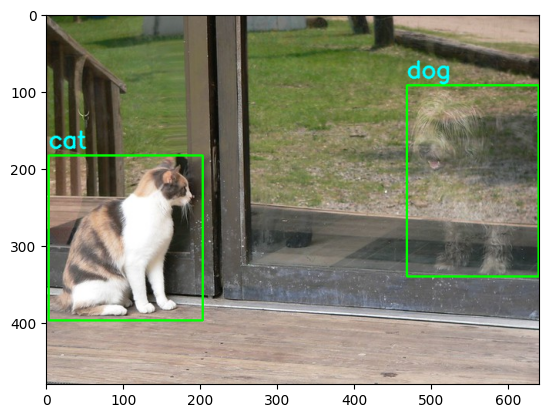

In [5]:
"""
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 
'flickr_url': '', 'coco_url': '', 'date_captured': 0}]

for

{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 
'flickr_url': '', 'coco_url': '', 'date_captured': 0}

"""

for image_json in images_info:
    file_name=image_json['file_name']
    image_width=image_json['width']
    image_height=image_json['height']
    image_id=image_json['id']
#     print(file_name)
#     print(image_width)
#     print(image_height)
#     print(image_id)
    image_path=os.path.join('/Users/iamseungman/MS/ImageProcessing/0614/',file_name)
#     print(image_path)
    
    # 파일명만 있는 이유 -> 디렉토리가 어떻게 구성될지 몰라서
    # image read
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    #bbox info
    for anno_json in annotations_info:
        if image_id==anno_json['image_id']:
            bbox=anno_json['bbox']
#             print(bbox)
            x=int(bbox[0])
            y=int(bbox[1])
            w=int(bbox[2])
            h=int(bbox[3])
            print('bbox 좌표 확인 >> ', x,y,w,h)
            
            # 박스 그리기
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            
            # 라벨 표시
            category_id=anno_json['category_id']
            print(category_id)
            
            label_name=label_dict[category_id]
            print(label_name)
            image=cv2.putText(image,label_name,(x,y-10),
                              cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv2.LINE_AA)
            
    plt.imshow(image)
    plt.show()
